#===============================================================================================================
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#------- Project: EVALUATION OF SQL INJECTION (SQLi) ATTACK DETECTION STRATEGIES IN WEB ------------------------
#------- APPLICATIONS USING MACHINE LEARNING -------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#------- By: Santiago Taborda Echeverri ------------------------------------------------------------------------
#-------     santiago.tabordae@udea.edu.co ---------------------------------------------------------------------
#-------     Telecommunications engineering student ------------------------------------------------------------
#-------     Cyber Security Analyst Intern at AizoOn Technology Consulting -------------------------------------
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
#===============================================================================================================

In [1]:
import time
import numpy as np
import pandas as pd
import utils
from joblib import load
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
# File paths for input and output CSV files
mithril_total_file_path = 'mithril_total_logs_validation.csv'
mithril_raw_file_path = 'mithril_SQLi_validation_raw.csv'
mithril_extract_file_path = 'mithril_SQLi_validation_Dataset.csv'

# Filter logs and extract relevant data
utils.filter_logs(mithril_total_file_path, mithril_raw_file_path)
utils.extract_data_waf(mithril_raw_file_path, mithril_extract_file_path)

# Convert CSV file to pandas DataFrame
df_validation_waf = pd.read_csv(mithril_extract_file_path)

# Pre-process the 'Query' column using the function preprocess_input from the utils module custum .py
preprocess_column = df_validation_waf['Query'].apply(utils.preprocess_input)
df_validation_waf['preprocess_column'] = preprocess_column          # Add the pre-processed data as a new column

column_order = ['Query', 'preprocess_column', 'Label']              # Define the desired order of columns
df_validation_waf = df_validation_waf.reindex(columns=column_order) # Reorder the DataFrame columns

df_validation_waf

,Query,preprocess_column,Label
0,"133"" ORDER BY 9341#, (empty)","0 "" order by 0 # , ( empty )",1
1,"133"" ORDER BY 1#, (empty)","0 "" order by 0 # , ( empty )",1
2,"133"") ORDER BY 1101#, (empty)","0 "" ) order by 0 # , ( empty )",1
3,"133"") ORDER BY 1#, (empty)","0 "" ) order by 0 # , ( empty )",1
4,"133' ORDER BY 6926#, (empty)","0 ' order by 0 # , ( empty )",1
...,...,...,...
1514,"node'nvOpzp; AND 1=1 OR (<'"">iKO)),,","node ' nvopzp ; and 0 = 0 or ( < ' "" ...",1
1515,"2069'nvOpzp; AND 1=1 OR (<'"">iKO)),, (empty)","0 ' nvopzp ; and 0 = 0 or ( < ' "" ...",1
1516,"1'nvOpzp; AND 1=1 OR (<'"">iKO)),,","0 ' nvopzp ; and 0 = 0 or ( < ' "" ...",1
1517,"node'nvOpzp; AND 1=1 OR (<'"">iKO)),,","node ' nvopzp ; and 0 = 0 or ( < ' "" ...",1


In [3]:
# Load the vectorizer from the specified path
vectorizer_duplicates_noBalanced = load('./noBalanced_models/vectorizer_duplicates.joblib')

# Vectorize the 'preprocess_column' using the NLP_transform function from utils with a vectorizer model
df_validation_vectorized = utils.NLP_load_transform(df_validation_waf["preprocess_column"], df_validation_waf["Label"], vectorizer_duplicates_noBalanced)

# Separate features (X) and target variable (y)
X = df_validation_vectorized.drop(columns=['Label'])
y = df_validation_vectorized['Label']

result_table = []                                      # Initialize an empty list to store results

main_path_images = './images/noBalanced_validation/'   # Define the main path for saving images

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


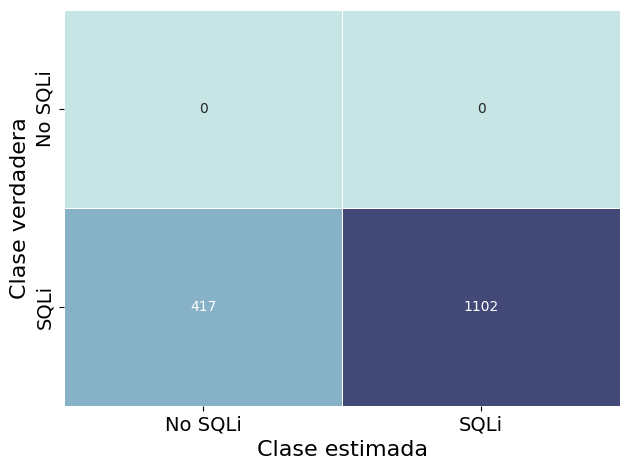

In [4]:
model_NB_name = "Gaussian Naive Bayes"       # Define the model name

# Load the model from the specified path
model_NB = load('./noBalanced_models/NB_duplicates.joblib')

t0_val_NB = time.time()                     # Start timer for validation
y_NB_pred = model_NB.predict(X)             # Make predictions on the validation set
t_val_NB = time.time() - t0_val_NB          # Calculate validation time

# Evaluate the model and generate metrics
model_NB_metrics = utils.metrics(model_NB_name, y, y_NB_pred, main_path_images+'NB_duplicates.pdf')
model_NB_metrics.append(t_val_NB)           # Append validation time to the metrics
result_table.append(model_NB_metrics)       # Add the metrics to the result table

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


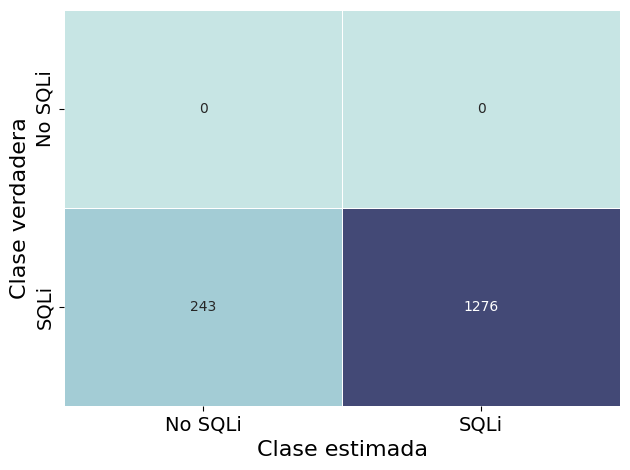

In [5]:
model_MNB_name = "Multinomial Naive Bayes"   # Define the model name

# Load the model from the specified path
model_MNB= load('./noBalanced_models/MNB_duplicates.joblib')

t0_val_MNB = time.time()                     # Start timer for validation
y_MNB_pred = model_MNB.predict(X)            # Make predictions on the validation set
t_val_MNB = time.time() - t0_val_MNB         # Calculate validation time

# Evaluate the model and generate metrics
model_MBB_metrics = utils.metrics(model_MNB_name, y, y_MNB_pred, main_path_images+'MNB_duplicates.pdf')
model_MBB_metrics.append(t_val_MNB)          # Append validation time to the metrics
result_table.append(model_MBB_metrics)       # Add the metrics to the result table

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


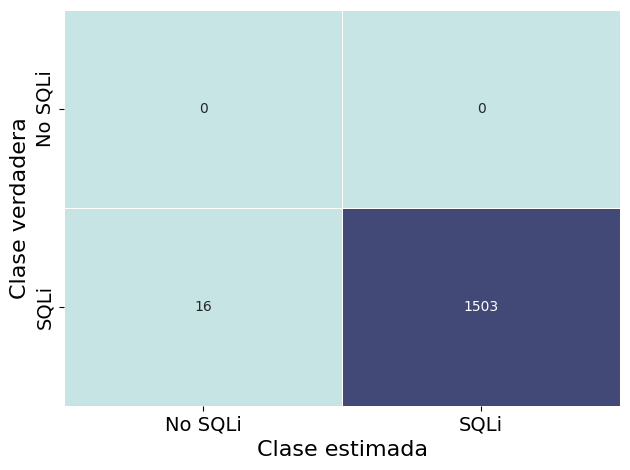

In [6]:
model_LR_name = "Logistic Regression"       # Define the model name

# Load the model from the specified path
model_LR= load('./noBalanced_models/LR_duplicates.joblib')

t0_val_LR = time.time()                     # Start timer for validation
y_LR_pred = model_LR.predict(X)             # Make predictions on the validation set
t_val_LR = time.time() - t0_val_LR          # Calculate validation time

# Evaluate the model and generate metrics
model_LR_metrics = utils.metrics(model_LR_name, y, y_LR_pred, main_path_images+'LR_duplicates.pdf')
model_LR_metrics.append(t_val_LR)           # Append validation time to the metrics
result_table.append(model_LR_metrics)       # Add the metrics to the result table

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


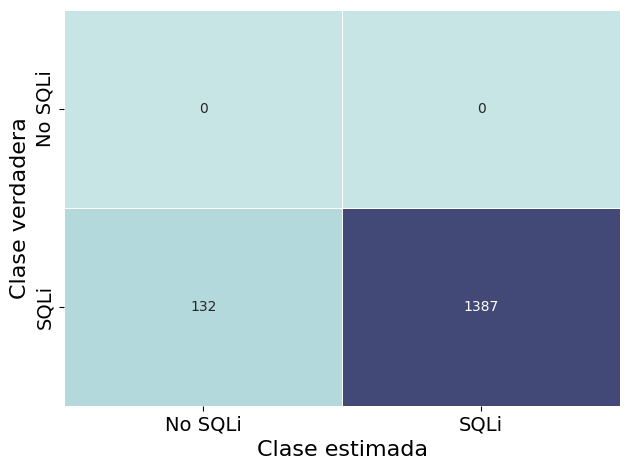

In [7]:
model_RF_name = "Random Forest"             # Define the model name

# Load the model from the specified path
model_RF= load('./noBalanced_models/RF_duplicates.joblib')

t0_val_RF = time.time()                     # Start timer for validation
y_RF_pred = model_RF.predict(X)             # Make predictions on the validation set
t_val_RF = time.time() - t0_val_RF          # Calculate validation time

# Evaluate the model and generate metrics
model_RF_metrics = utils.metrics(model_RF_name, y, y_RF_pred, main_path_images+'RF_duplicates.pdf')
model_RF_metrics.append(t_val_RF)           # Append validation time to the metrics
result_table.append(model_RF_metrics)       # Add the metrics to the result table

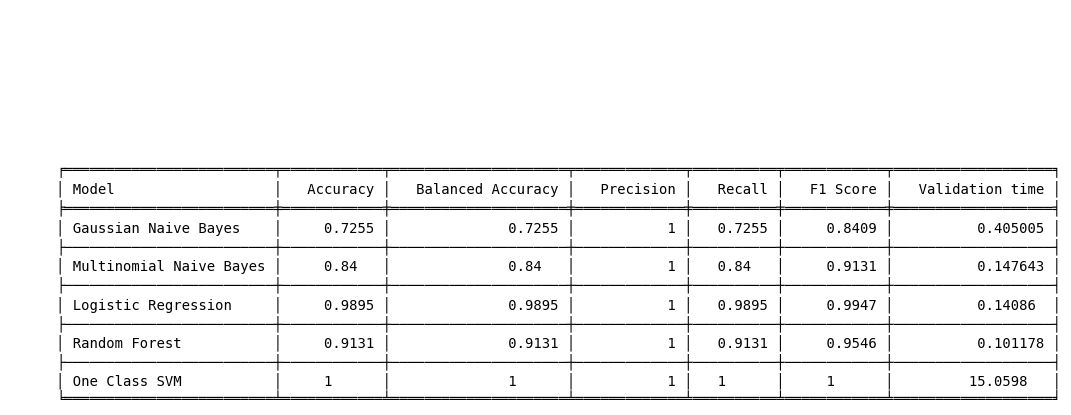

In [9]:
# Define the headers for the result table
headers_table = ["Model", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1 Score", "Validation time"]

# Create a formatted table using tabulate
table = tabulate(result_table, headers=headers_table, tablefmt="fancy_grid")

# Plot the table using matplotlib
plt.figure(figsize=(6, 4))
plt.text(0.1, 0.5, table, {'font': 'monospace'}, fontsize=10, va='top')
plt.axis('off')
plt.show()

# Define the file path for saving the metrics
file_table1_path = "./noBalanced_models/metrics_duplicates_validation_output.txt"

# Write the result table to a text file
with open(file_table1_path, 'w') as f:
    for inner_list in result_table:
        f.write(' '.join(map(str, inner_list)) + '\n')

In [10]:
# Load the vectorizer from the specified path
vectorizer_noDuplicates_noBalanced = load('./noBalanced_models/vectorizer_noDuplicates.joblib')

# Vectorize the 'preprocess_column' using the NLP_transform function from utils with a vectorizer model
df_validation_noDuplicates_vectorized = utils.NLP_load_transform(df_validation_waf["preprocess_column"], df_validation_waf["Label"], vectorizer_noDuplicates_noBalanced)

# Separate features (X) and target variable (y)
X2 = df_validation_noDuplicates_vectorized.drop(columns=['Label'])
y2 = df_validation_noDuplicates_vectorized['Label']

result_table2 = []                                     # Initialize an empty list to store results

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


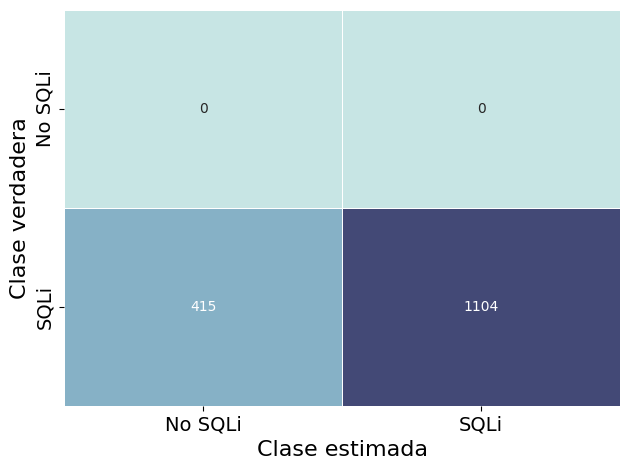

In [11]:
model2_NB_name = "Gaussian Naive Bayes"       # Define the model name

# Load the model from the specified path
model2_NB= load('./noBalanced_models/NB_noDuplicates.joblib')

t0_val2_NB = time.time()                      # Start timer for validation
y2_NB_pred = model2_NB.predict(X2)            # Make predictions on the validation set
t_val2_NB = time.time() - t0_val2_NB          # Calculate validation time

# Evaluate the model and generate metrics
model2_NB_metrics = utils.metrics(model2_NB_name, y2, y2_NB_pred, main_path_images+'NB_noDuplicates.pdf')
model2_NB_metrics.append(t_val2_NB)           # Append validation time to the metrics
result_table2.append(model2_NB_metrics)       # Add the metrics to the result table

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


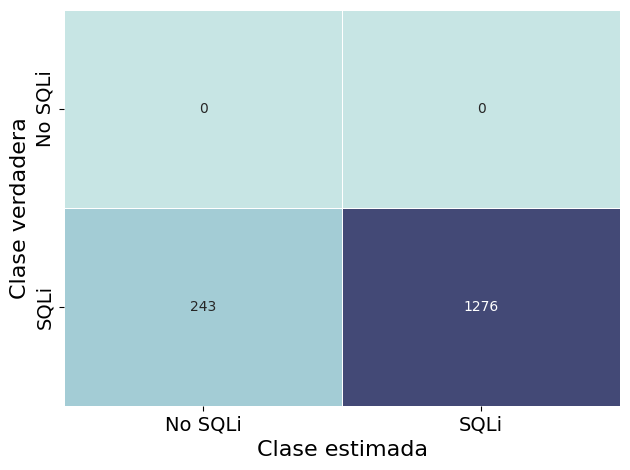

In [12]:
model2_MNB_name = "Multinomial Naive Bayes"    # Define the model name

# Load the model from the specified path
model2_MNB= load('./noBalanced_models/MNB_noDuplicates.joblib')

t0_val2_MNB = time.time()                      # Start timer for validation
y2_MNB_pred = model2_MNB.predict(X2)           # Make predictions on the validation set
t_val2_MNB = time.time() - t0_val2_MNB         # Calculate validation time

# Evaluate the model and generate metrics
model2_MBB_metrics = utils.metrics(model2_MNB_name, y2, y2_MNB_pred, main_path_images+'MNB_noDuplicates.pdf')
model2_MBB_metrics.append(t_val2_MNB)          # Append validation time to the metrics
result_table2.append(model2_MBB_metrics)       # Add the metrics to the result table

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


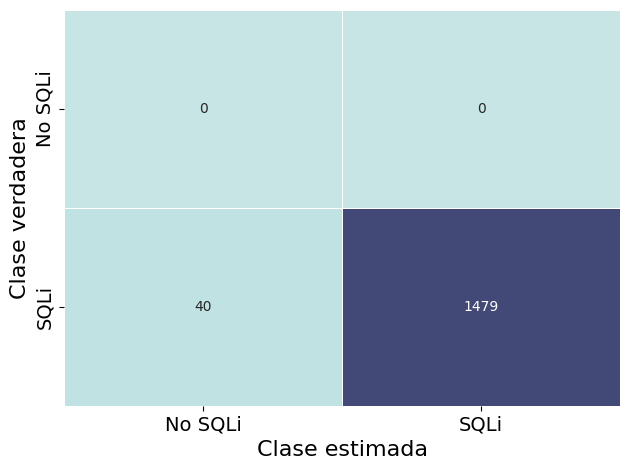

In [13]:
model2_LR_name = "Logistic Regression"       # Define the model name

# Load the model from the specified path
model2_LR= load('./noBalanced_models/LR_noDuplicates.joblib')

t0_val2_LR = time.time()                      # Start timer for validation
y2_LR_pred = model2_LR.predict(X2)            # Make predictions on the validation set
t_val2_LR = time.time() - t0_val2_LR          # Calculate validation time

# Evaluate the model and generate metrics
model2_LR_metrics = utils.metrics(model2_LR_name, y2, y2_LR_pred, main_path_images+'LR_noDuplicates.pdf')
model2_LR_metrics.append(t_val2_LR)           # Append validation time to the metrics
result_table2.append(model2_LR_metrics)       # Add the metrics to the result table

c:\Users\santiago.taborda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


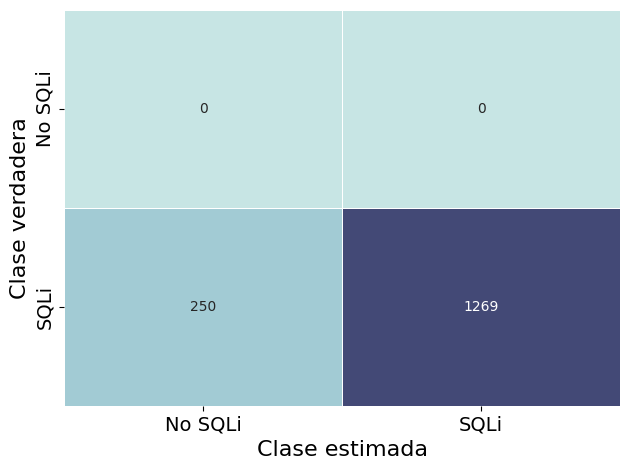

In [14]:
model2_RF_name = "Random Forest"              # Define the model name

# Load the model from the specified path
model2_RF= load('./noBalanced_models/RF_noDuplicates.joblib')

t0_val2_RF = time.time()                      # Start timer for validation
y2_RF_pred = model2_RF.predict(X2)            # Make predictions on the validation set
t_val2_RF = time.time() - t0_val2_RF          # Calculate validation time

# Evaluate the model and generate metrics
model2_RF_metrics = utils.metrics(model2_RF_name, y2, y2_RF_pred, main_path_images+'RF_noDuplicates.pdf')
model2_RF_metrics.append(t_val2_RF)           # Append validation time to the metrics
result_table2.append(model2_RF_metrics)       # Add the metrics to the result table

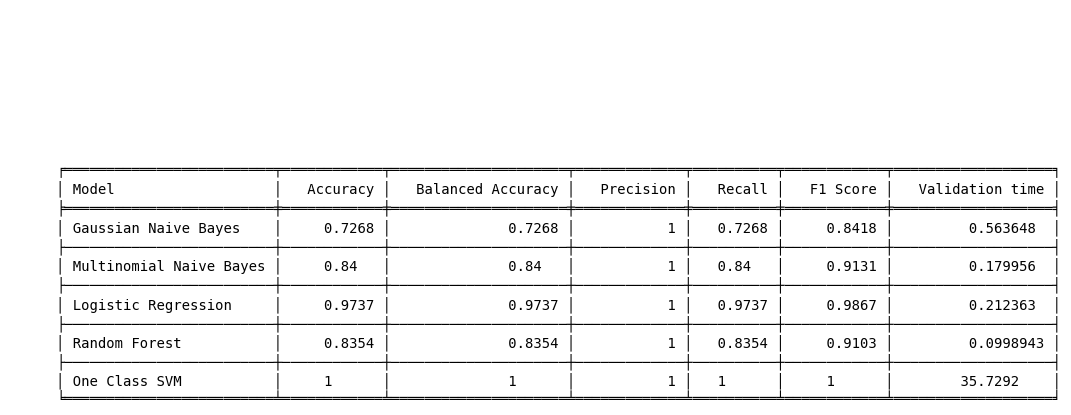

In [16]:
# Define the headers for the result table
headers_table2 = ["Model", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1 Score", "Validation time"]

# Create a formatted table using tabulate
table2 = tabulate(result_table2, headers=headers_table2, tablefmt="fancy_grid")

# Plot the table using matplotlib
plt.figure(figsize=(6, 4))
plt.text(0.1, 0.5, table2, {'font': 'monospace'}, fontsize=10, va='top')
plt.axis('off')
plt.show()

# Define the file path for saving the metrics
file_table2_path = "./noBalanced_models/metrics_noDuplicates_validation_output.txt"

# Write the result table to a text file
with open(file_table2_path, 'w') as f:
    for inner_list in result_table2:
        f.write(' '.join(map(str, inner_list)) + '\n')